In [1]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
import openpyxl
import akshare as ak
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 5000
pd.options.display.float_format = lambda x: '%.5f' % x
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format='svg'

In [2]:
price_600940=ak.stock_zh_a_hist(symbol='600941',period='daily',adjust='qfq',start_date='20240101',end_date='20250101')
price_600940=price_600940.drop(columns=['股票代码','最高','最低','成交量','成交额','振幅','换手率','涨跌额'])
initial_cash=100000.0
tax=0.00025
df_600940_trade=pd.DataFrame(columns=['日期','开盘','收盘','涨跌幅','持仓','总市值','现金','交易信号','策略收益率','股票收益率'],index=range(len(price_600940)))
df_600940_trade.loc[:,'持仓']=0
df_600940_trade.loc[:,'现金']=initial_cash
df_600940_trade.loc[:,'交易信号']=0
df_600940_trade.loc[:,'总市值']=0.0
df_600940_trade.loc[:,'日期']=price_600940.loc[:,'日期']
df_600940_trade.loc[:,'涨跌幅']=price_600940.loc[:,'涨跌幅']
df_600940_trade.loc[:,'收盘']=price_600940.loc[:,'收盘']
df_600940_trade.loc[:,'开盘']=price_600940.loc[:,'开盘']
df_600940_trade.loc[:,'策略收益率']=0
df_600940_trade.loc[:,'股票收益率']=0
df_600940_trade.loc[:,'总资产']=initial_cash
#遍历处理dataframe每一行数据
for i in range(1,len(df_600940_trade)):
    # 前一天涨跌幅为负，买入
    if df_600940_trade.loc[i-1,'涨跌幅']<0:
        df_600940_trade.loc[i,'交易信号']=1
        buy=max(df_600940_trade.loc[i,'开盘']*100*tax,5)+df_600940_trade.loc[i,'开盘']*100
        if df_600940_trade.loc[i-1,'现金']>=buy:
            df_600940_trade.loc[i,'现金']=df_600940_trade.loc[i-1,'现金']-buy
            df_600940_trade.loc[i,'持仓']=df_600940_trade.loc[i-1,'持仓']+100
        else:
            df_600940_trade.loc[i,'现金']=df_600940_trade.loc[i-1,'现金']
            df_600940_trade.loc[i,'持仓']=df_600940_trade.loc[i-1,'持仓']
    # 前一天涨跌幅为正，卖出
    elif df_600940_trade.loc[i-1,'涨跌幅']>0:
        df_600940_trade.loc[i,'交易信号']=-1
        if df_600940_trade.loc[i-1,'持仓']>=100:
            sell=df_600940_trade.loc[i,'开盘']*100-max(df_600940_trade.loc[i,'开盘']*100*tax,5)
            df_600940_trade.loc[i,'现金']=df_600940_trade.loc[i-1,'现金']+sell
            df_600940_trade.loc[i,'持仓']=df_600940_trade.loc[i-1,'持仓']-100
        else:
            df_600940_trade.loc[i,'现金']=df_600940_trade.loc[i-1,'现金']
            df_600940_trade.loc[i,'持仓']=df_600940_trade.loc[i-1,'持仓']
    # 涨跌幅为0，不操作
    else:
        df_600940_trade.loc[i,'现金']=df_600940_trade.loc[i-1,'现金']
        df_600940_trade.loc[i,'持仓']=df_600940_trade.loc[i-1,'持仓']
     # 计算当日总市值和总资产，策略和股票收益率
    df_600940_trade.loc[i,'总市值']=df_600940_trade.loc[i,'持仓']*df_600940_trade.loc[i,'收盘']
    df_600940_trade.loc[i,'总资产']=df_600940_trade.loc[i,'总市值']+df_600940_trade.loc[i,'现金']
    df_600940_trade.loc[i,'策略收益率']=(df_600940_trade.loc[i,'总资产']/initial_cash)-1
    df_600940_trade.loc[i,'股票收益率']=df_600940_trade.loc[i,'收盘']/df_600940_trade.loc[0,'收盘']-1

#df_600940_trade['策略收益率']=df_600940_trade['策略收益率'].apply(lambda x:f'{x*100:.2f}%')
#df_600940_trade['股票收益率']=df_600940_trade['股票收益率'].apply(lambda x:f'{x*100:.2f}%')


Text(0.5, 1.0, '600941中国移动：无限做T策略（2024年）')

Text(0.5, 0, '时间/月')

Text(0, 0.5, '收益率')

Text(20100, -0.05, '数据来源：akshare，不构成任何投资建议，仅供参考\n策略：下跌时收盘买入100股，上涨时卖出100股\n交易费率万2不免5(可更改)\n制作者：NPC雷神1')

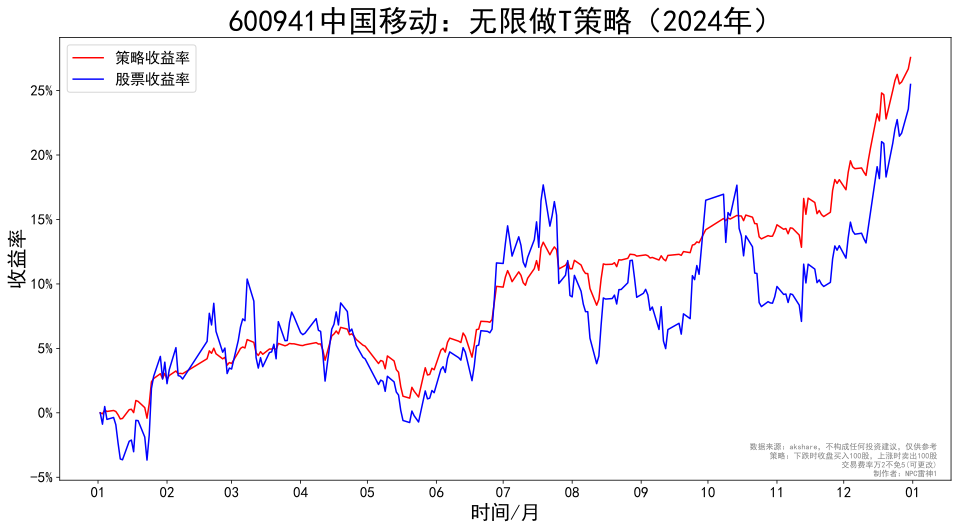

In [3]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
fig,ax1=plt.subplots(figsize=(16,8))
plt.plot(df_600940_trade['日期'],df_600940_trade['策略收益率'],color='r',label='策略收益率')
plt.plot(df_600940_trade['日期'],df_600940_trade['股票收益率'],color='b',label='股票收益率')
plt.title('600941中国移动：无限做T策略（2024年）',fontsize=30)
plt.xlabel('时间/月',fontsize=20)
plt.ylabel('收益率',fontsize=20)
plt.legend(fontsize=15)
plt.text(x=20100,y=-0.05,s='数据来源：akshare，不构成任何投资建议，仅供参考\n策略：下跌时收盘买入100股，上涨时卖出100股\n交易费率万2不免5(可更改)\n制作者：NPC雷神1',ha='right',va='bottom',fontsize=8,color='gray')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.yaxis.set_major_formatter(ticker.PercentFormatter(1,decimals=0))
plt.tick_params(labelsize=15)
plt.savefig(r'E:/jupyter/plot/600941中国移动：无限做T策略（2024年）.png')
plt.show()

#